In [1]:
import networkx as nx

import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### k-Color FCA model

In [2]:
def FCA(G, s, k, iteration):
    """Implements the Firefly Cellular Automata model

    Args:
        G (NetworkX Graph): Input graph to the model
        s (array): Current state
        k (int): k-color FCA
        iteration (int): number of iterations

    Returns:
        sns.heatmap: Heatmap of the final state of all the FCA iterations
    """
    b = (k-1)//2 # Blinking color
    ret = s
    s_next = np.zeros(G.number_of_nodes())
    for h in range(iteration):
        if h != 0:
            s = s_next # Update to the newest state
            ret = np.vstack((ret, s_next))
        s_next = np.zeros(G.number_of_nodes())
        for i in range(G.number_of_nodes()):
            flag = False # True if inhibited by the blinking neighbor
            if s[i] > b:
                for j in range(G.number_of_nodes()):
                    if s[j] == b and list(G.nodes)[j] in list(G.adj[list(G.nodes)[i]]):
                        flag = True
                if flag:
                    s_next[i] = s[i]
                else:
                    s_next[i] = (s[i]+1)%k
            else:
                s_next[i] = (s[i]+1)%k
                
    if len(np.unique(ret[-1])) == 1 and iteration != 1:
        print("Synchronized!")
    else:
        print("Didn't synchronize yet.")
        
    phase = pd.DataFrame(ret)
    return sns.heatmap(phase)

## FCA on regular graphs

### Example 1:

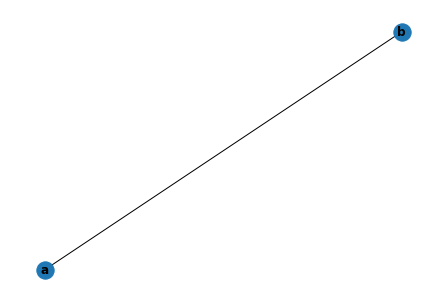

In [3]:
edgelist = [['a', 'b']]
G = nx.Graph()
G.add_edges_from(edgelist)
nx.draw(G, with_labels=True, font_weight='bold')

Synchronized!


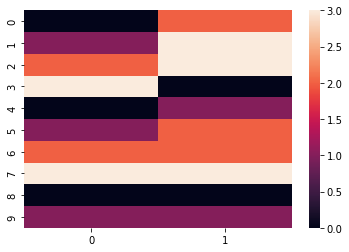

In [4]:
FCA(G, [0, 2], 4, 10);

### Example 2:

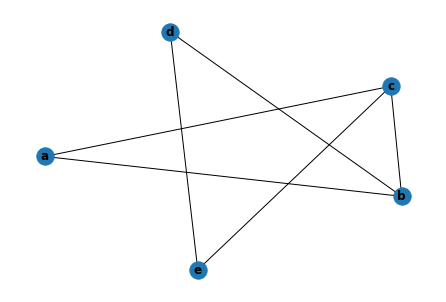

In [5]:
edgelist = [['a','b'], ['a', 'c'], ['b', 'c'], ['b', 'd'], ['c', 'e'], ['d', 'e']]
G = nx.Graph()
G.add_edges_from(edgelist)
nx.draw(G, with_labels=True, font_weight='bold')

Synchronized!


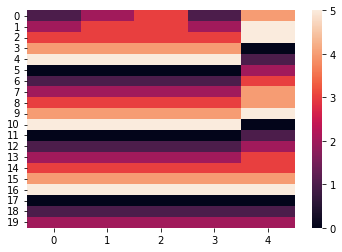

In [6]:
FCA(G, [1, 2, 3, 1, 4], 6, 20);

## FCA on finite-trees:

$\textbf{(i)}$ If $k\in \{3, 4, 5, 6\}$ and $T = (V , E)$ is any finite tree, then every $k-$coloring on $T$ synchronizes iff $T$ has maximum degree $< k$.

### Case 1 -> T has maximum degree < k:

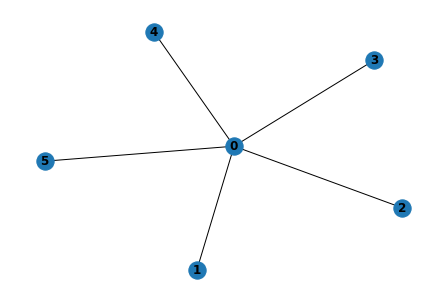

In [7]:
edgelist = [['1', '0'], ['2', '0'], ['3', '0'], ['4', '0'], ['5', '0']]
G = nx.Graph()
G.add_edges_from(edgelist)
nx.draw(G, with_labels=True, font_weight='bold')

Synchronized!


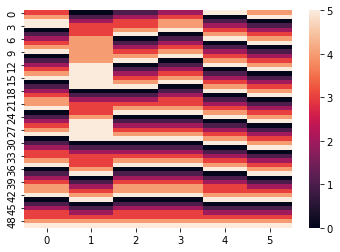

In [8]:
# Since maximum degree is 5, let us try case where degree < k (say 6):
FCA(G, [3, 0, 1, 2, 5, 4], 6, 50);

### Case 2 -> T has maximum degree > k:

['0', '3', '1', '2', '4']


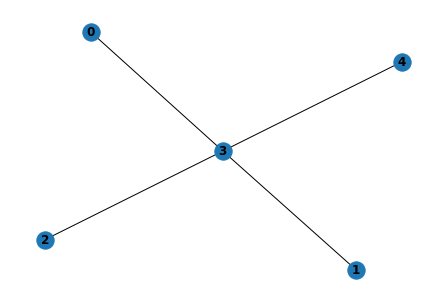

In [9]:
edgelist = [['0', '3'], ['1', '3'], ['2', '3'], ['4', '3']]
G = nx.Graph()
G.add_edges_from(edgelist)

# Printing the nodes because we need to set the vertex to 
# be a state > k/2 for seeing non-synchronization behavior
print(list(G.nodes))
# Since vertex '3' is at index 1, index 1 
# of our current state (s) should be > k/2

nx.draw(G, with_labels=True, font_weight='bold')

Doesn't synchronize yet.


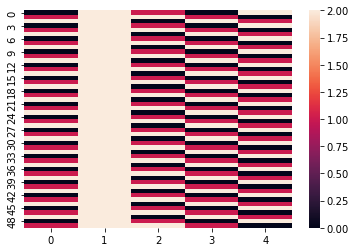

In [10]:
FCA(G, [0, 2, 1, 0, 2], 3, 50); # Notice index 1 is initially at state '2'

$\textbf{(ii)}$ If $k \geq 7$, then there exists a finite tree $T = (V,E)$ with maximum degree $\geq k/2+1$ and a $\textit{non-synchronizing}$ $k-$coloring on $T$.

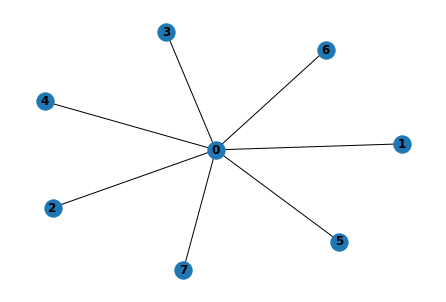

In [11]:
edgelist = [['1', '0'], ['2', '0'], ['3', '0'], ['4', '0'], ['5', '0'], ['6','0'], ['7','0']]
G = nx.Graph()
G.add_edges_from(edgelist)
nx.draw(G, with_labels=True, font_weight='bold')

Synchronized!


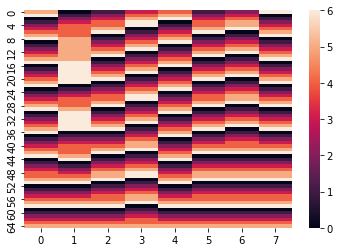

In [12]:
FCA(G, [5, 0, 1, 3, 4, 1, 2, 6], 7, 65);

## k-FCA on 2D Lattices:

Synchronized!


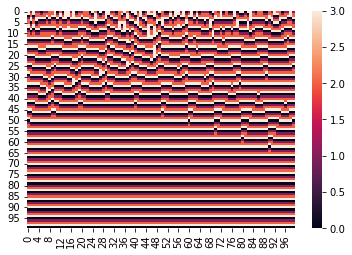

In [34]:
G = nx.grid_2d_graph(10, 10)
s = np.random.randint(4, size=10*10)
FCA(G, s, 4, 100);

Doesn't synchronize yet.


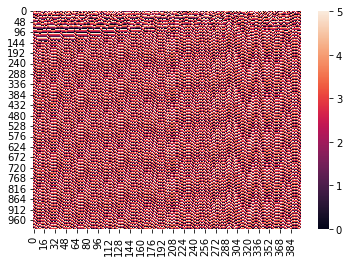

In [36]:
G = nx.grid_2d_graph(20, 20)
s = np.random.randint(6, size=20*20)
FCA(G, s, 6, 1000);

In [90]:
def FCA_2D(shape, k, iteration):
    b = (k-1)//2 # Blinking color
    (m, n) = shape
    G = nx.grid_2d_graph(m, n)
    s = np.random.randint(k, size=m*n)
    ret = s
    s_next = np.zeros(G.number_of_nodes())
    for h in range(iteration):
        if h != 0:
            s = s_next # Update to the newest state
            ret = np.vstack((ret, s_next))
        s_next = np.zeros(G.number_of_nodes())
        for i in range(G.number_of_nodes()):
            flag = False # True if inhibited by the blinking neighbor
            if s[i] > b:
                for j in range(G.number_of_nodes()):
                    if s[j] == b and list(G.nodes)[j] in list(G.adj[list(G.nodes)[i]]):
                        flag = True
                if flag:
                    s_next[i] = s[i]
                else:
                    s_next[i] = (s[i]+1)%k
            else:
                s_next[i] = (s[i]+1)%k
                
        ret = ret.reshape(shape)
        phase = pd.DataFrame(ret)
        sns.heatmap(phase)
        plt.savefig(f"./images/img{iteration}.png")
        
    return

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

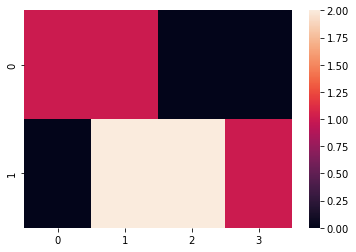

In [91]:
FCA_2D((2,4), 3, 10);

In [48]:
G = nx.grid_2d_graph(3, 2)

  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 3)	1
  (2, 0)	1
  (2, 3)	1
  (2, 4)	1
  (3, 1)	1
  (3, 2)	1
  (3, 5)	1
  (4, 2)	1
  (4, 5)	1
  (5, 3)	1
  (5, 4)	1


/var/folders/9w/kr1grtwx7gxc9ysp_clrx0y00000gn/T/ipykernel_37512/4111634772.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  print(nx.adjacency_matrix(G))
